In [41]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [42]:
import netCDF4 as nc
import pickle as pk
import matplotlib.pyplot as plt

In [43]:
# load bio NWA boundary condition file

bio_file = "/d1/enrique/bdry/NWA_bdry_bio.nc"
biods = nc.Dataset(bio_file)
biods.variables.keys()

odict_keys(['theta_s', 'theta_b', 'Tcline', 'hc', 's_rho', 's_w', 'Cs_r', 'Cs_w', 'h', 'ocean_time', 'alk_north', 'alk_south', 'alk_west', 'alk_east', 'cadet_arag_north', 'cadet_arag_south', 'cadet_arag_west', 'cadet_arag_east', 'cadet_calc_north', 'cadet_calc_south', 'cadet_calc_west', 'cadet_calc_east', 'dic_north', 'dic_south', 'dic_west', 'dic_east', 'ldon_north', 'ldon_south', 'ldon_west', 'ldon_east', 'lith_north', 'lith_south', 'lith_west', 'lith_east', 'lithdet_north', 'lithdet_south', 'lithdet_west', 'lithdet_east', 'nbact_north', 'nbact_south', 'nbact_west', 'nbact_east', 'ndet_north', 'ndet_south', 'ndet_west', 'ndet_east', 'ndi_north', 'ndi_south', 'ndi_west', 'ndi_east', 'nlg_north', 'nlg_south', 'nlg_west', 'nlg_east', 'nsm_north', 'nsm_south', 'nsm_west', 'nsm_east', 'nh4_north', 'nh4_south', 'nh4_west', 'nh4_east', 'no3_north', 'no3_south', 'no3_west', 'no3_east', 'po4_north', 'po4_south', 'po4_west', 'po4_east', 'o2_north', 'o2_south', 'o2_west', 'o2_east', 'srdon_nort

In [44]:
# pull out oxygen and nitrate

o2_south = biods.variables['o2_south'][:]
o2_east = biods.variables['o2_east'][:]

no3_south = biods.variables['no3_south'][:]
no3_east = biods.variables['no3_east'][:]

In [45]:
# pull out one time step
# they are all the same (plot to check, but pretty sure)

o2_south1 = o2_south[0, :, :]
o2_east1 = o2_east[0, :, :]

no3_south1 = no3_south[0, :, :]
no3_east1 = no3_east[0, :, :]

# plot bio MLR inputs to check

In [46]:
# import spatial vars
with open('BC_depth.p', 'rb') as f:
    depth_south, depth_east = pk.load(f)

with open('BC_coords.p', 'rb') as f:
    lon_south, lon_east, lat_south, lat_east = pk.load(f)

Text(0.5, 1.0, 'nitrate east')

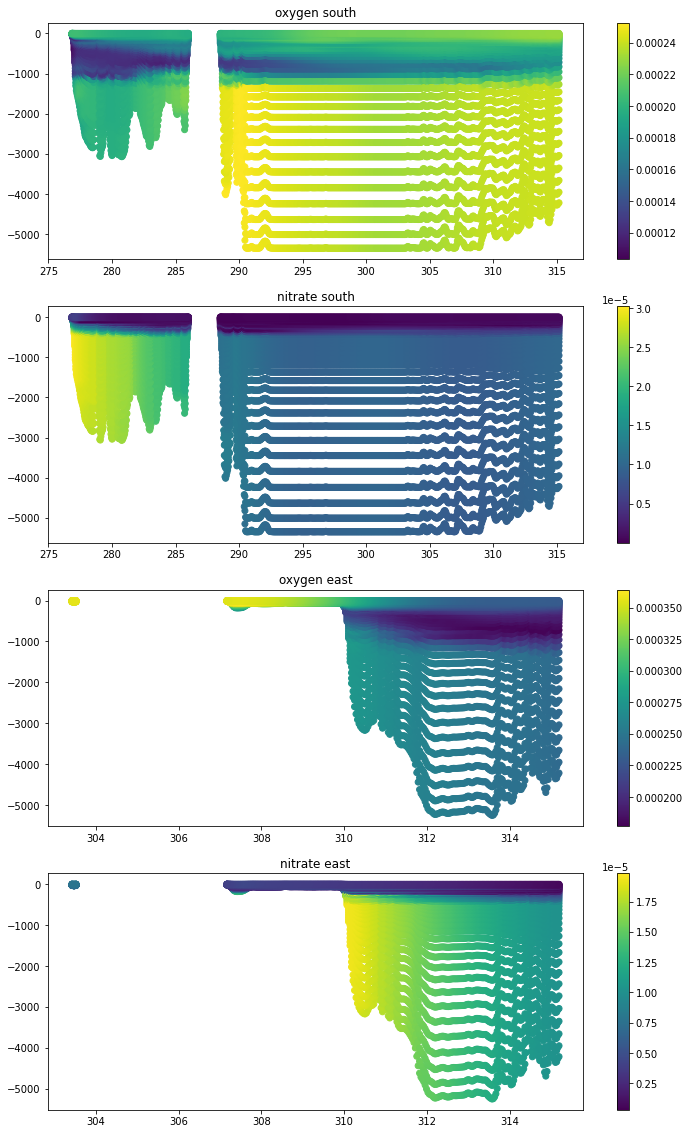

In [47]:
# combine plots as subplots
fig = plt.figure(figsize=(12,20))

ax = fig.add_subplot(411)
plt.scatter(lon_south, depth_south, marker='o', c=o2_south1)
plt.colorbar()
plt.title("oxygen south")

ax = fig.add_subplot(412)
plt.scatter(lon_south, depth_south, marker='o', c=no3_south1)
plt.colorbar()
plt.title("nitrate south")

ax = fig.add_subplot(413)
plt.scatter(lon_east, depth_east, marker='o', c=o2_east1)
plt.colorbar()
plt.title("oxygen east")

ax=fig.add_subplot(414)
plt.scatter(lon_east, depth_east, marker='o', c=no3_east1)
plt.colorbar()
plt.title("nitrate east")

# convert to umol/kg

In [48]:
o2_southu = o2_south1*10**6
o2_eastu = o2_east1*10**6

no3_southu = no3_south1*10**6
no3_eastu = no3_east1*10**6

# normalize variables

In [49]:
Omean = 214.7
Ostd = 44.7

On_south = (o2_southu-Omean)/Ostd
On_east = (o2_eastu-Omean)/Ostd

Nmean = 7.58
Nstd = 7.65

Nn_south = (no3_southu-Nmean)/Nstd
Nn_east = (no3_eastu-Nmean)/Nstd

# plot to check normalized

Text(0.5, 1.0, 'nitrate east')

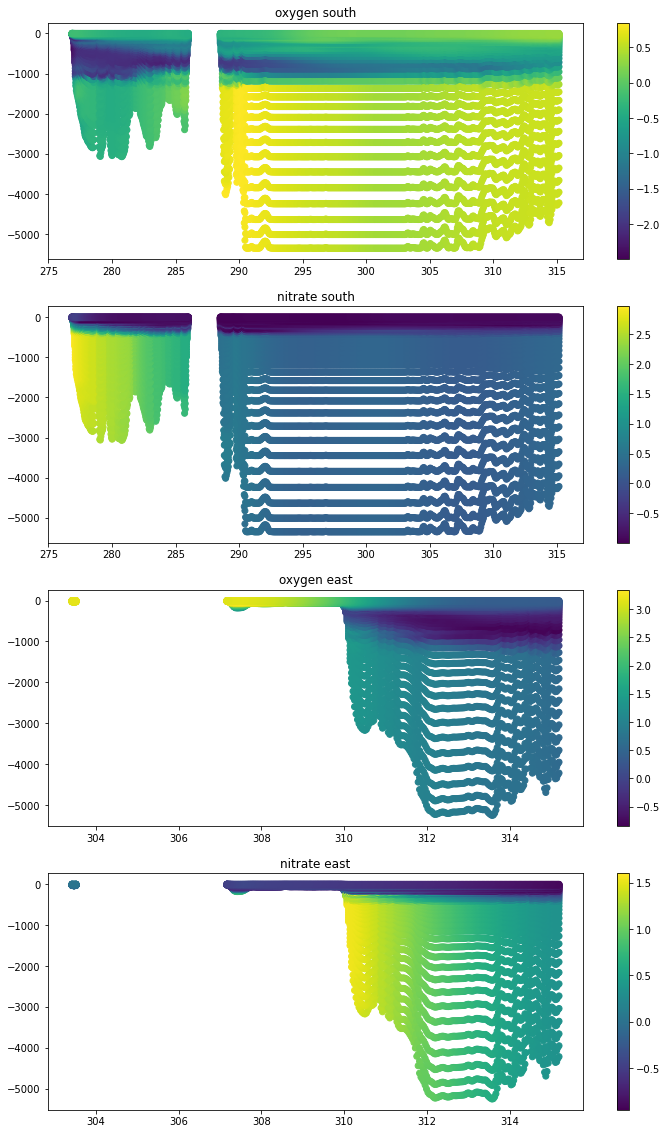

In [51]:
# combine plots as subplots
fig = plt.figure(figsize=(12,20))

ax = fig.add_subplot(411)
plt.scatter(lon_south, depth_south, marker='o', c=On_south)
plt.colorbar()
plt.title("oxygen south")

ax = fig.add_subplot(412)
plt.scatter(lon_south, depth_south, marker='o', c=Nn_south)
plt.colorbar()
plt.title("nitrate south")

ax = fig.add_subplot(413)
plt.scatter(lon_east, depth_east, marker='o', c=On_east)
plt.colorbar()
plt.title("oxygen east")

ax=fig.add_subplot(414)
plt.scatter(lon_east, depth_east, marker='o', c=Nn_east)
plt.colorbar()
plt.title("nitrate east")

In [52]:
# MLR physical inputs are practical salinity and in situ temp
# pickle physical inputs
with open('bio_inputs_norm.p', 'wb') as f:
    pk.dump([On_south, On_east, Nn_south, Nn_east], f)